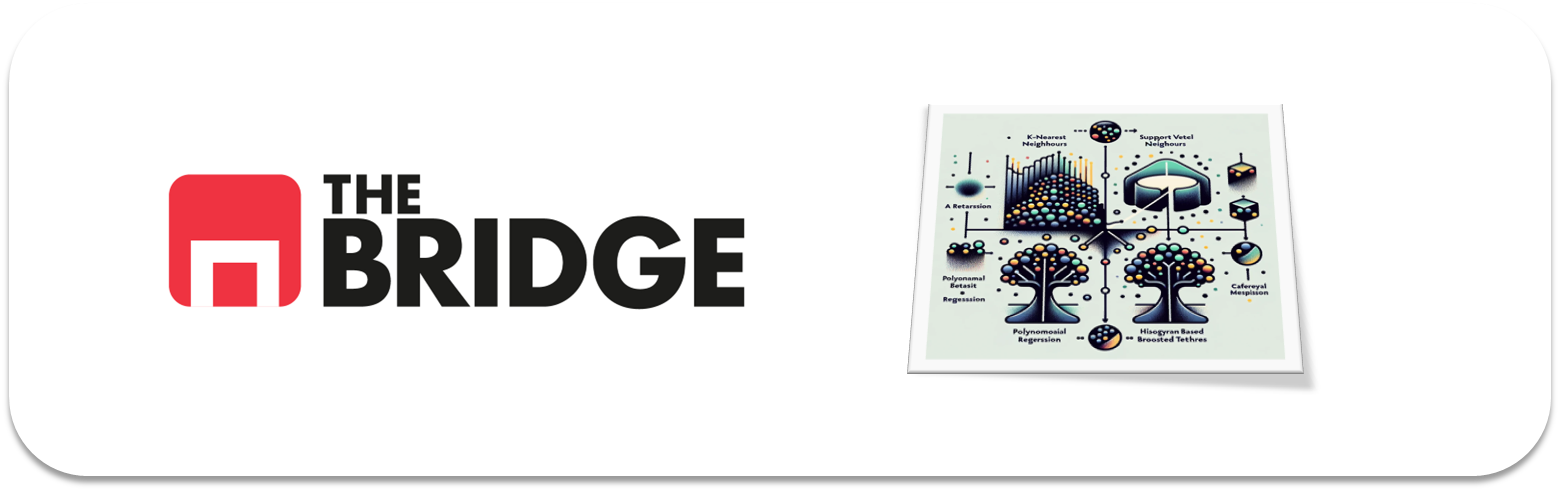

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [102]:
import pandas as pd
import numpy as np
import bootcampviztools as bt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, make_scorer, recall_score
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos

plt.rc('font', size=14)  
plt.rc('axes', labelsize=8, titlesize=8)  
plt.rc('legend', fontsize=14)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)  


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [52]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [53]:
num_col = df.drop(columns=["SeriousDlqin2yrs"]).columns

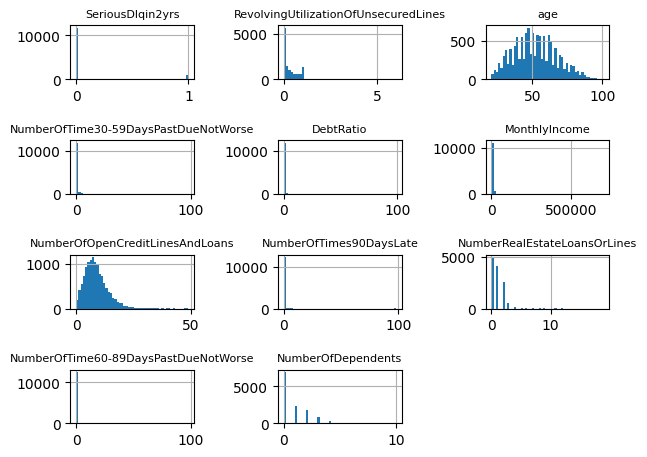

In [54]:
df.hist(bins=50)
plt.tight_layout()
plt.show()

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

clasificacion

In [55]:
target = "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

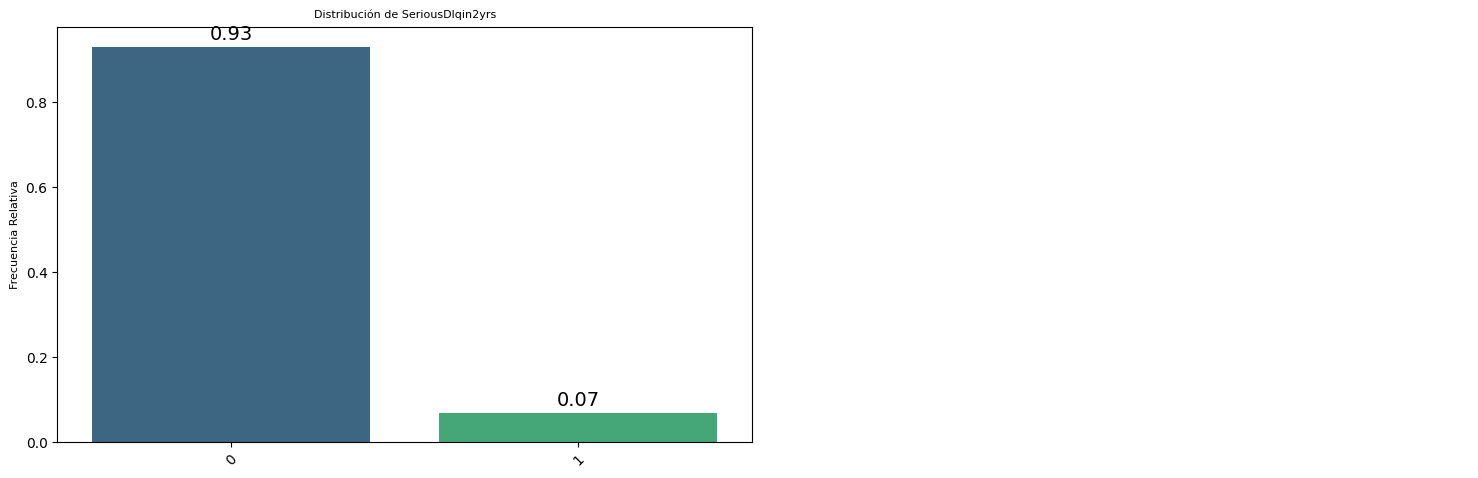

In [56]:
bt.pinta_distribucion_categoricas(df, [target], relativa=True, mostrar_valores=True)

- totalmente desbalanceada

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [57]:
train, test = train_test_split(df, test_size=.2, random_state=42)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10029 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 2   age                                   10029 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64  
 4   DebtRatio                             10029 non-null  float64
 5   MonthlyIncome                         9458 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       10029 non-null  int64  
 7   NumberOfTimes90DaysLate               10029 non-null  int64  
 8   NumberRealEstateLoansOrLines          10029 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64  
 10  NumberOfDependents                    9889 non-null   float64
dtypes: float64(4), int

In [59]:
train.dropna(inplace=True)

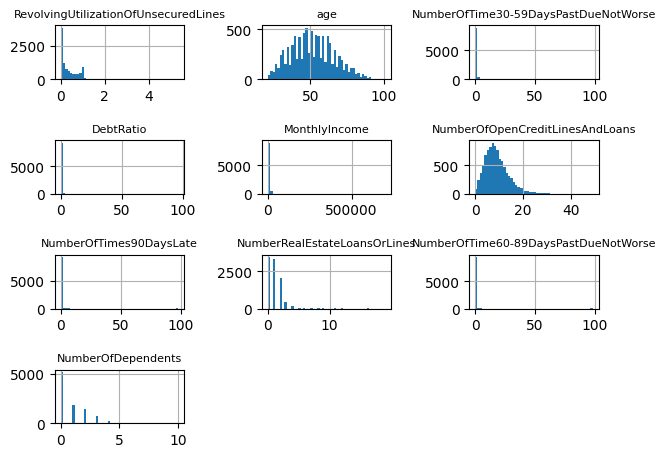

In [60]:
train[num_col].hist(bins=50)
plt.tight_layout()

In [61]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [62]:
heavy_tail = ["RevolvingUtilizationOfUnsecuredLines", "NumberOfTime30-59DaysPastDueNotWorse", "DebtRatio", "MonthlyIncome", "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", 'NumberOfTime60-89DaysPastDueNotWorse', "NumberOfDependents"]

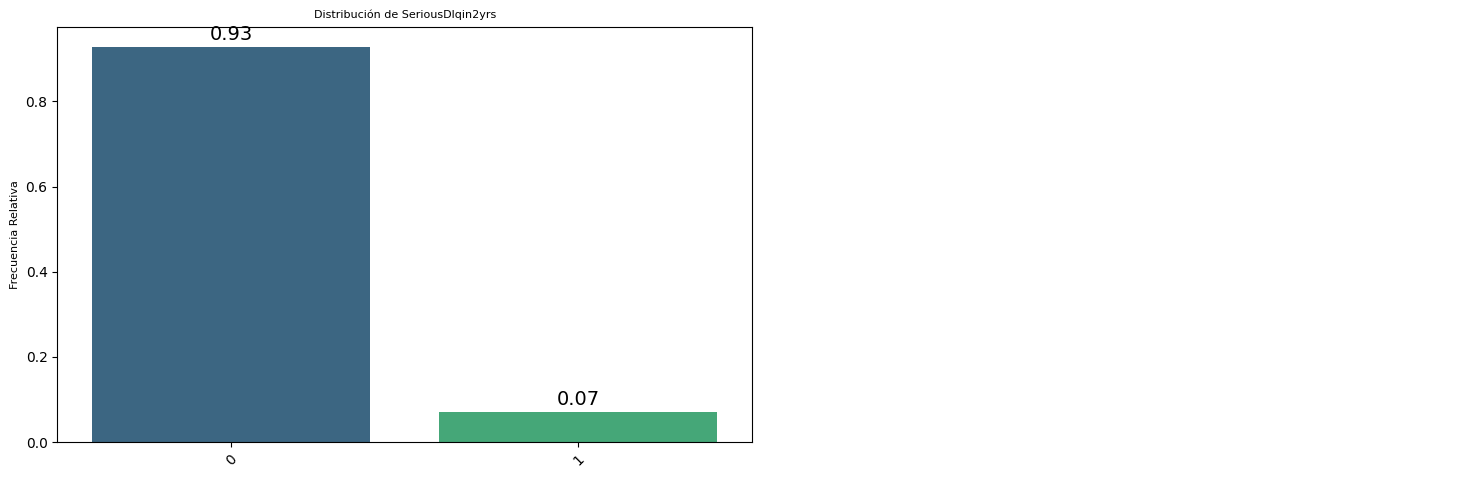

In [63]:
bt.pinta_distribucion_categoricas(train, [target], relativa=True, mostrar_valores=True)

In [64]:
test.dropna(inplace=True)

In [65]:
train[heavy_tail] = np.log(train[heavy_tail] + 1)

In [67]:
test[heavy_tail] = np.log(test[heavy_tail]+1)

In [68]:
X_train = train[num_col]
y_train = train[target]

X_test = test[num_col]
y_test = test[target]

In [69]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

### KNN

In [73]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
cross_val_score(knn, X_train, y_train, cv=5, scoring="balanced_accuracy")

array([0.5891819 , 0.58007125, 0.59317439, 0.58531545, 0.59658525])

In [99]:



mayor_recall = 0
mejor_k = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    recall_medio = cross_val_score(knn, X_train, y_train, cv=5, scoring= make_scorer(recall_score, pos_label = 1)).mean()

    if recall_medio > mayor_recall:
        mayor_recall = recall_medio
        mejor_k = k
    
print(mejor_k, mayor_recall)


1 0.26555002763957986


In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2202
           1       0.23      0.22      0.23       156

    accuracy                           0.90      2358
   macro avg       0.59      0.59      0.59      2358
weighted avg       0.90      0.90      0.90      2358



In [104]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [105]:

mayor_recall = 0
mejor_k = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    recall_medio = cross_val_score(knn, X_train_smote, y_train_smote, cv=5, scoring= make_scorer(recall_score, pos_label = 1)).mean()

    if recall_medio > mayor_recall:
        mayor_recall = recall_medio
        mejor_k = k
    
print(mejor_k, mayor_recall)

5 0.988502352451567


In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
smote_pred = knn.predict(X_test)
print(classification_report(y_test, smote_pred))

# best knn k = 5 con smote

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2202
           1       0.19      0.58      0.28       156

    accuracy                           0.80      2358
   macro avg       0.58      0.70      0.58      2358
weighted avg       0.91      0.80      0.85      2358

